In [1]:
import numpy as np,matplotlib.pyplot as plt
from skimage import data

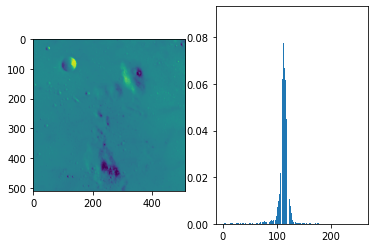

In [2]:
img=data.moon()
prob=[]
for i in range(256):
    tmp=img[img == i]
    prob.append(len(tmp)/img.size)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.bar(np.arange(256),prob)
plt.show()

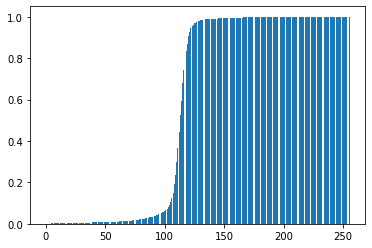

In [3]:
cusmsum=np.cumsum(prob)#累计直方图
plt.bar(np.arange(256),cusmsum)
plt.show()

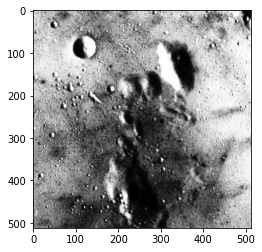

In [4]:
pixles_cumsum0_prob=np.round(cusmsum*255) #映射关系
test = np.copy(img)
for i in range(test.shape[0]):
    for j in range(test.shape[1]):
        _pixel = test[i,j]
        _pixel = pixles_cumsum0_prob[_pixel]
        test[i,j]=_pixel
plt.imshow(test,cmap="gray")
plt.show()

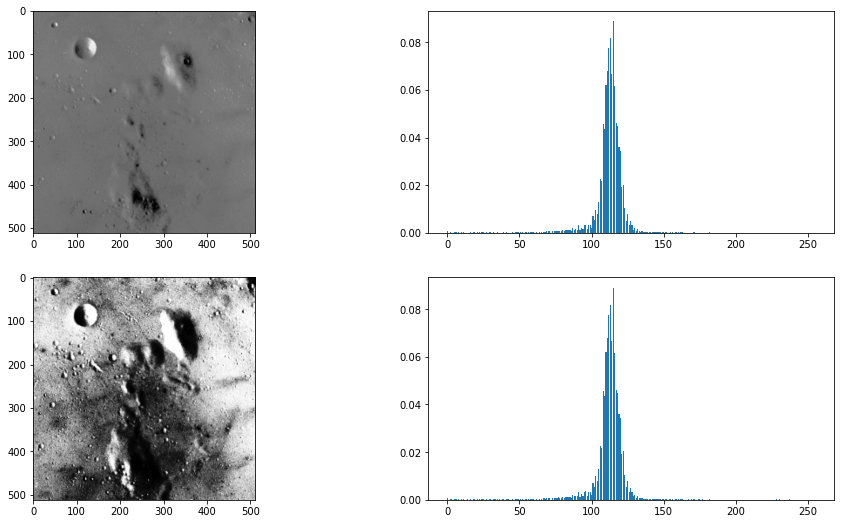

In [5]:
after_prob=[]
for i in range(256):
    tmp=img[img == i]
    after_prob.append(len(tmp)/img.size)

fig=plt.figure(figsize=(16,9))
org=fig.add_subplot(2,2,1)
org.imshow(img,cmap="gray")
org.hist=fig.add_subplot(2,2,2)
org.hist.bar(np.arange(256),prob)
after_histeq=fig.add_subplot(2,2,3)
after_histeq.imshow(test,cmap="gray")
after_histeq=fig.add_subplot(2,2,4)
after_histeq.bar(np.arange(256),after_prob)
plt.show()

# OpenCV

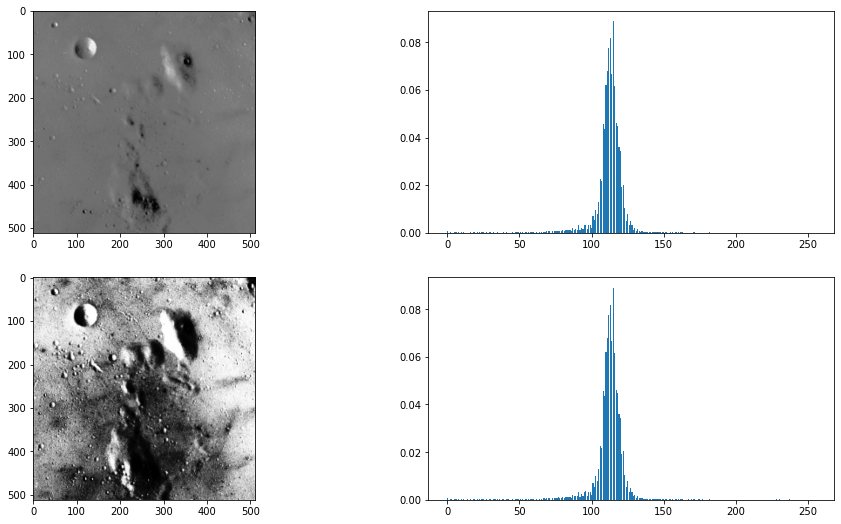

In [6]:
from skimage import data
import cv2 as cv
import matplotlib.pyplot as plt
img=data.moon()
img_equalize = cv.equalizeHist(img)

fig=plt.figure(figsize=(16,9))
org=fig.add_subplot(2,2,1)
org.imshow(img,cmap="gray")
org.hist=fig.add_subplot(2,2,2)
org.hist.bar(np.arange(256),prob)
after_histeq=fig.add_subplot(2,2,3)
after_histeq.imshow(img_equalize,cmap="gray")
after_histeq=fig.add_subplot(2,2,4)
after_histeq.bar(np.arange(256),after_prob)
plt.show()